# 2014년 ~ 2016년 졸음운전 교통사고 데이터 분석

## 1. 준비과정 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2014~2016년 졸음운전 교통사고 데이터 분석.ipynb',
 '2014년 졸음운전 교통사고.csv',
 '2015년 졸음운전 교통사고.csv',
 '2016년 졸음운전 교통사고.csv',
 'crime_2016.csv',
 'image',
 'iris 데이터 분석.ipynb',
 'Seaborn 그래프 연습.ipynb',
 'test.csv',
 'Titanic_DataAnalysis.ipynb',
 'train.csv',
 '한국 범죄 데이터 분석.ipynb']

os 모듈을 불러와서 os.listdir() 함수로 현재 디렉토리 안에 있는 파일명을 확인할 수 있다.

In [3]:
df_2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', encoding = 'cp949')
df_2015 = pd.read_csv('2015년 졸음운전 교통사고.csv', encoding = 'cp949')
df_2016 = pd.read_csv('2016년 졸음운전 교통사고.csv', encoding = 'cp949')

세 개의 데이터를 각각 불러와서 데이터의 기본 정보를 파악한다.

In [4]:
df_2014.head()

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474


In [5]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      12 non-null     object
 1   사고(건)   12 non-null     int64 
 2   사망(명)   12 non-null     int64 
 3   부상(명)   12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [6]:
df_2014.shape

(12, 4)

In [7]:
df_2014.columns

Index(['구분', '사고(건)', '사망(명)', '부상(명)'], dtype='object')

In [8]:
df_2014.index

RangeIndex(start=0, stop=12, step=1)

In [9]:
df_2014.describe()

,사고(건),사망(명),부상(명)
count,12.000000,12.000000,12.000000
mean,202.166667,10.833333,389.916667
std,27.498209,4.365845,60.657696
min,145.000000,3.000000,268.000000
25%,181.000000,8.500000,355.250000
50%,209.500000,12.000000,389.000000
75%,222.750000,14.000000,435.000000
max,233.000000,17.000000,474.000000


In [10]:
df_2015.head()

,구분,사고(건),사망(명),부상(명)
0,2015년1월,205,8,375
1,2015년2월,175,8,375
2,2015년3월,237,4,492
3,2015년4월,227,10,486
4,2015년5월,231,9,504


In [11]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      12 non-null     object
 1   사고(건)   12 non-null     int64 
 2   사망(명)   12 non-null     int64 
 3   부상(명)   12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [12]:
df_2015.describe()

,사고(건),사망(명),부상(명)
count,12.000000,12.000000,12.000000
mean,225.083333,9.000000,460.416667
std,28.968504,4.221159,62.545196
min,175.000000,3.000000,375.000000
25%,206.500000,7.750000,400.250000
50%,220.500000,8.000000,480.500000
75%,240.750000,10.000000,501.750000
max,273.000000,19.000000,556.000000


In [13]:
df_2016.head()

,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435
3,2016년4월,216,7,419
4,2016년5월,239,13,522


In [14]:
df_2016.describe()

,사고(건),사망(명),부상(명)
count,12.000000,12.000000,12.000000
mean,202.750000,8.166667,408.250000
std,23.014324,3.186144,60.051682
min,168.000000,4.000000,328.000000
25%,186.000000,5.750000,363.500000
50%,200.000000,7.000000,402.500000
75%,219.500000,10.500000,441.250000
max,239.000000,13.000000,522.000000


## 2. 세 개의 데이터를 하나로 병합하기

pd.concat( [ ] ) 함수는 데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수이다.

[ ] (중괄호) 안에 합칠 데이터프레임 명을 넣는다. 

유의할 점은 원본 데이터의 인덱스가 유지된다는 것이다.  
아래 예시를 보면 11번 인덱스 다음 번에는 12번이 와야하는데 df2의 첫 번째 인덱스인 0이 나왔다.

따라서 **ignore_index = True** 옵션을 이용해서 인덱스를 다시 설정한다.

row를 합칠 때는 별다른 옵션은 없고 columns을 합칠 때는 axis = 1 옵션을 입력한다.

In [15]:
pd.concat([df_2014, df_2015, df_2016]).head(14)

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474
5,2014년6월,233,13,457
6,2014년7월,229,14,431
7,2014년8월,222,9,447
8,2014년9월,225,15,430
9,2014년10월,210,14,392


In [16]:
pd.concat([df_2014, df_2015, df_2016], ignore_index = True).head(14)

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474
5,2014년6월,233,13,457
6,2014년7월,229,14,431
7,2014년8월,222,9,447
8,2014년9월,225,15,430
9,2014년10월,210,14,392


In [17]:
df1 = pd.concat([df_2014, df_2015, df_2016], ignore_index = True).set_index('구분')
df1.head()

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2014년1월 to 2016년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   36 non-null     int64
 1   사망(명)   36 non-null     int64
 2   부상(명)   36 non-null     int64
dtypes: int64(3)
memory usage: 1.1+ KB


## 3. 년도, 월별로 인덱스를 설정(멀티 인덱스)하기

In [19]:
# 복사본 생성
df2 = df1.copy()

copy() 함수를 이용해서 데이터 프레임의 복사본을 생성한다.

In [20]:
# 복사본의 인덱스 값 출력
df2.index

Index(['2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월', '2014년6월',
       '2014년7월', '2014년8월', '2014년9월', '2014년10월', '2014년11월', '2014년12월',
       '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년5월', '2015년6월',
       '2015년7월', '2015년8월', '2015년9월', '2015년10월', '2015년11월', '2015년12월',
       '2016년1월', '2016년2월', '2016년3월', '2016년4월', '2016년5월', '2016년6월',
       '2016년7월', '2016년8월', '2016년9월', '2016년10월', '2016년11월', '2016년12월'],
      dtype='object', name='구분')

In [21]:
# 인덱스 값을 날짜 형식으로 변환
df2.index = pd.to_datetime(df2.index, format = '%Y년%m월')
df2.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

여기서는 %Y년%m월 형식으로 된 df2.index를 pandas의 to_datetime 함수를 통해 datetime object로 변환한다.

만약 원본값이 2015-01-01이라면 format을 %Y-%m-%d로 바꾸면 된다.

In [22]:
df2.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

dtype이 'object'에서 'datetime64[ns]'로 바뀐 것을 알 수 있다.

In [23]:
df2.set_index([df2.index.year, df2.index.month], inplace = True)

**set_index( [ A , B , ... ] )** 형식을 이용하면 인덱스를 두 개 이상 설정할 수 있다.

본 분석에서는 날짜 형식으로 변환한 한 개의 인덱스를 년도와 월별로 변환해서 두 개의 인덱스를 설정했다.

**inplace = True**는 변경 사항을 바로 적용한다는 의미이다.

In [24]:
# 인덱스명 변경(names)
df2.index.names = ['년도', '월']

데이터 프레임명.index.names = [ 'A', 'B' ] 함수를 이용해서 인덱스 명을 변경할 수 있다.

In [25]:
df2.head()

사고(건)  사망(명)  부상(명)
년도   월                     
2014 1    169      7    347
     2    145      3    268
     3    206     12    358
     4    182      4    360
     5    218     17    474

## 4. 년도 및 월별 평균 사망자 수 확인

### 방법1

In [26]:
pd.pivot_table(data = df2.reset_index(), index = '년도', values = '사망(명)', aggfunc='mean')

,사망(명)
년도,
2014,10.833333
2015,9.000000
2016,8.166667


In [27]:
pd.pivot_table(data=df2.reset_index(), index = '월', values = '사망(명)', aggfunc='mean')

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


방법1은 해당 데이터 프레임의 인덱스를 재설정해서 피벗 테이블을 구하는 방법이다.

### 방법2
groupby() 함수를 이용해서 그룹별로 통계량을 구할 수 있다.
- 사용법: groupby( '기준 컬럼명' ).요약통계함수( )[ '집계될 컬럼명' ]
- '기준 컬럼명'별 '계산될 컬럼명'을 파악한다.

- 중괄호를 두 번( [ [ ] ] )하면 데이터 프레임 형식으로 얻을 수 있다.

In [43]:
df2.groupby('년도').mean()['사망(명)']

년도
2014    10.833333
2015     9.000000
2016     8.166667
Name: 사망(명), dtype: float64

In [42]:
df2.groupby('월').mean()[['사망(명)']]

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


In [30]:
df2.groupby('년도').mean()

,사고(건),사망(명),부상(명)
년도,,,
2014,202.166667,10.833333,389.916667
2015,225.083333,9.000000,460.416667
2016,202.750000,8.166667,408.250000


In [31]:
df2.groupby('월').mean()[['사망(명)']]

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


## 5. 2016년 사고대비 사망율 구하기

In [32]:
# 2016년만 추출
df2.loc[2016]

,사고(건),사망(명),부상(명)
월,,,
1,192,5,387
2,174,6,328
3,217,7,435
4,216,7,419
5,239,13,522
6,200,12,362
7,227,9,460
8,230,7,490
9,187,13,347


In [33]:
# 2016년 사망자 수의 총합 / 2016년 사고 건수의 총합
df2.loc[2016]['사망(명)'].sum() / df2.loc[2016]['사고(건)'].sum()

0.04027949034114262

## 6. 2014년도 월별 사망, 부상 데이터를 BarChart로 그리기

In [34]:
# 2014년만 추출
df3 = df2.loc[2014]
df3

,사고(건),사망(명),부상(명)
월,,,
1,169,7,347
2,145,3,268
3,206,12,358
4,182,4,360
5,218,17,474
6,233,13,457
7,229,14,431
8,222,9,447
9,225,15,430


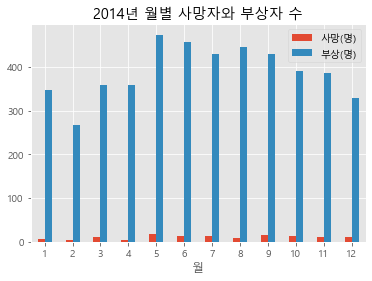

In [35]:
plt.style.use('ggplot')
df3[['사망(명)', '부상(명)']].plot(kind = 'bar', rot=0)
plt.title('2014년 월별 사망자와 부상자 수')
plt.show()

rot 는 X축 라벨의 회전(rotation) 각도를 설정하는데 사용한다.

**결과**

2014년 1년동안 졸음운전으로 발생한 피해자 수는 사망자보다 부상자가 압도적으로 많다.

가장 많은 달은 5월과 6월이고 가장 적은 달은 2월이다.

사망자 수는 큰 차이는 없고 가장 많은 사망자 수가 있는 달은 5월이다. 가장 적은 달은 2월과 4월로 보인다.

## 7. 2015년 대비  사망이 가장 많이 증가/감소한 2016년도 월을 구하기

- 방법: 2015년보다 2016년에 더 많은 사망자가 발생한 달을 구해야 하므로 (2016년의 사망자 수 - 2015년의 사망자 수)를 해서 가장 높은 양수 값을 갖는 달을 찾는다.

### 값이 높은 n번째까지 출력 : nlargest

- 형식: 데이터프레임.nlargest(n, columns, keep='first')

    - n : 상위 몇개까지 나타낼 것인가

    - keep='first' : 동등한 값이 있다면 제일 먼저 나온 값을 보여준다.

    - keep='all' : 동등한 값을 모두 표시한다.

데이터프레임의 경우 우선 순위에 따라 컬럼(columns)을 명시해 줄 수 있다.


### 값이 작은 n번째까지 출력 : nsmallest

nlargest() 함수와 정반대의 개념이고 형식은 똑같다.

In [36]:
df2.loc[2016, '사망(명)'] - df2.loc[2015, '사망(명)']

월
1     -3
2     -2
3      3
4     -3
5      4
6      4
7      2
8    -12
9      3
10    -4
11     2
12    -4
Name: 사망(명), dtype: int64

In [37]:
(df2.loc[2016, '사망(명)'] - df2.loc[2015, '사망(명)']).nlargest(1, keep='all')

월
5    4
6    4
Name: 사망(명), dtype: int64

In [38]:
(df2.loc[2016, '사망(명)'] - df2.loc[2015, '사망(명)']).nsmallest(2, keep='all')

월
8    -12
10    -4
12    -4
Name: 사망(명), dtype: int64

**결과**

2015년에 비해 2016년에 사망자 수가 가장 많이 증가한 달은 5월과 6월이다. 작년보다 4명 더 사망했다.

반대로 2015년에 비해 2016에 사망자 수가 많이 감소한 달은 8월이다. 작년과 12명이 차이가 난다.

## 8. 3년간 졸음운전 교통사고 추이(선 그래프)

In [39]:
df1.head()

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474


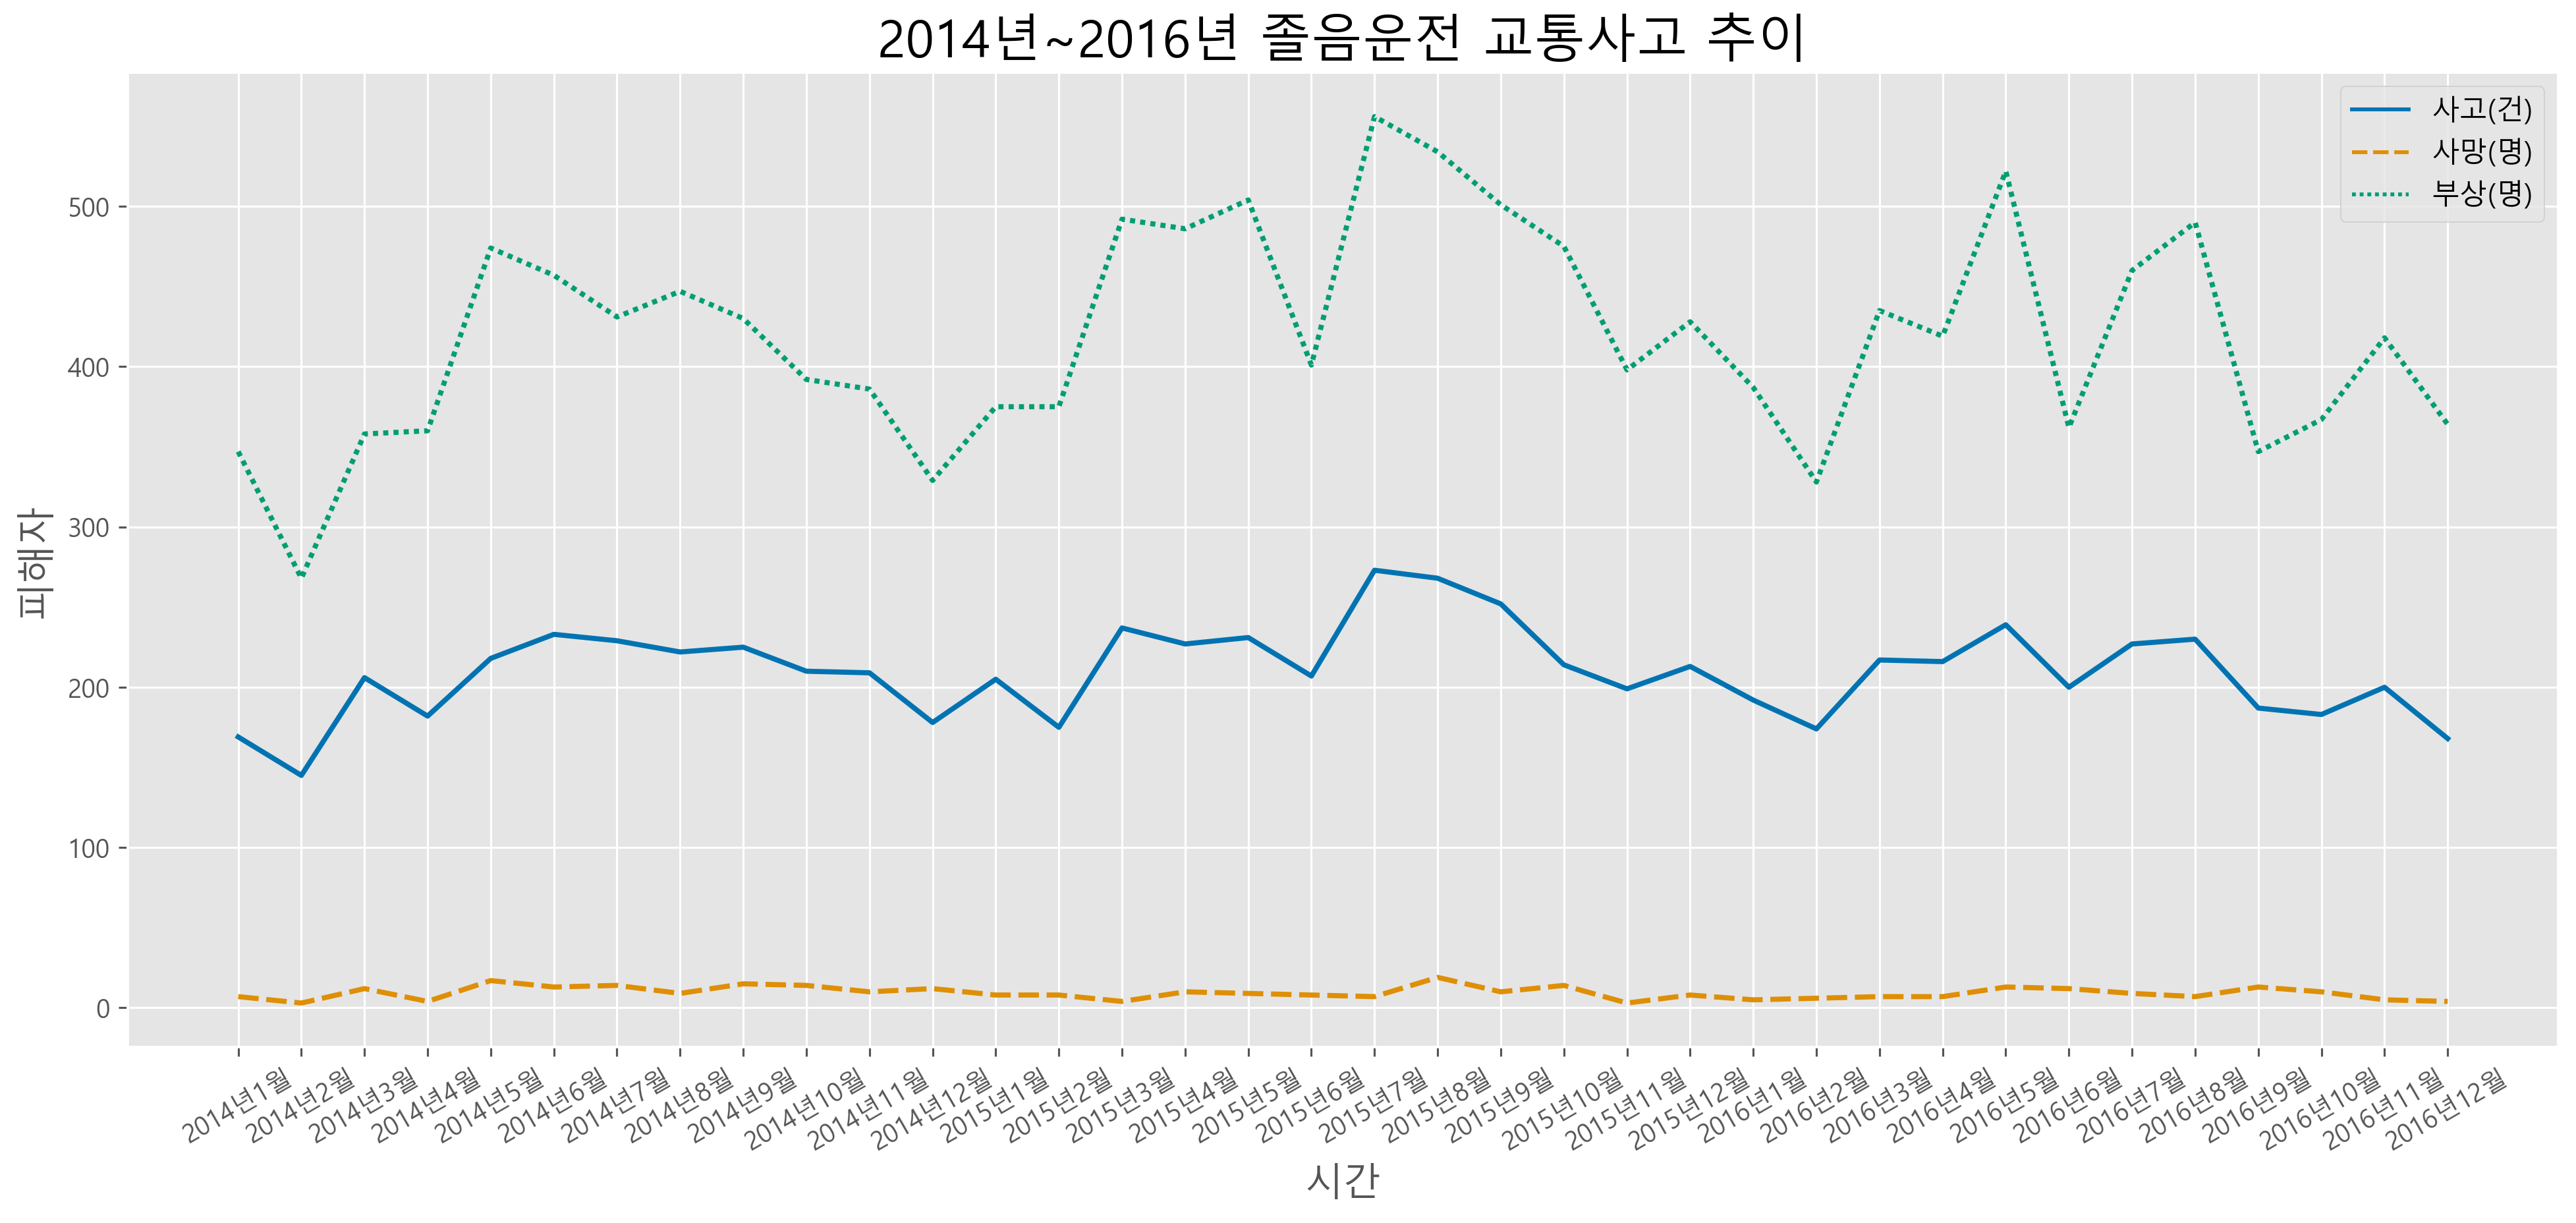

In [40]:
plt.figure(figsize=(17, 7), dpi=280)
sns.lineplot(data=df1, palette = 'colorblind', linewidth=2)
plt.rc('font', family = 'Malgun Gothic')

plt.title('2014년~2016년 졸음운전 교통사고 추이', fontsize = 20)
plt.xlabel('시간', fontsize=15)
plt.xticks(rotation = 30) # x축 값 30도 회전
plt.ylabel('피해자', fontsize=15)
plt.legend(fontsize=11, loc='best') # loc='best': 범례를 그래프 상에서 최적의 위치로 자동으로 지정

plt.show()

선 그래프 색상은 palette 옵션의 'colorblind' 색상을 이용했다. 선 굵기를 지정하는 옵션은 linewidth이며

plt.xticks() 함수의 rotation 옵션으로 x축값을 회전시킬 수 있다.

그리고 plt.legend() 함수의 loc= 'best'옵션으로 범례를 그래프 상에서 최적의 위치로 자동으로 지정할 수 있다.

**결과**

2014년 초부터 2016년 말까지 부상자 수는 큰 변동을 겪었지만 최종적으로 2014년 1월과 2016년 12월을 비교하면 큰 변화는 없다. 

부상자 수는 2015년 7월경에 가장 많고 2014년 2월에 가장 적다.

사고 건수도 마찬가지로 양 끝 값을 보았을 때 큰 변화는 없다. 최대 사고 건수가 있던 날은 2015년 7월이며 최저는 2014년 2월이다. 

이는 부상자 수 그래프와 같은 결과이고 부상자 수 그래프와 사고 건수 그래프의 경향이 비슷하다는 것을 확인할 수 있다.

사망자 수와 부상자 수는 약 300배 정도 차이가 난다. 2015년 8월에 사망자 수가 가장 높게 나왔고 가장 낮은 날은 현재 그래프에서 정확하게 확인하기 어렵다.